In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip= True,
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 1721 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [9]:
class_names = list(train_generator.class_indices.keys())

In [10]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
count = 0

for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.4089247  0.39323843 0.4481404 ]
  [0.41459987 0.3989136  0.45381555]
  [0.4283944  0.41270813 0.46761012]
  ...
  [0.81145155 0.8036084  0.8585104 ]
  [0.8133666  0.80552346 0.8604254 ]
  [0.8152816  0.8074385  0.86234045]]

 [[0.40940347 0.3937172  0.44861916]
  [0.41412112 0.39843482 0.4533368 ]
  [0.42823482 0.41254854 0.46745053]
  ...
  [0.75775796 0.7499148  0.8048168 ]
  [0.7544864  0.74664325 0.8015452 ]
  [0.7512148  0.74337167 0.7982736 ]]

 [[0.40988225 0.39419597 0.44909793]
  [0.41364235 0.39795607 0.45285803]
  [0.42807525 0.41238895 0.46729094]
  ...
  [0.6788316  0.67098844 0.7258904 ]
  [0.6784326  0.67058945 0.72549146]
  [0.67803365 0.6701905  0.7250925 ]]

 ...

 [[0.45813003 0.43460062 0.48165944]
  [0.4572523  0.43372288 0.4807817 ]
  [0.45637456 0.43284515 0.47990397]
  ...
  [0.60966796 0.59790325 0.6645699 ]
  [0.63097644 0.61921173 0.6858784 ]
  [0.59654933 0.5847846  0.6514513 ]]

 [[0.4685791  0.44504967 0.49210852]
  [0.47057396 0.44704455 0.49410337]


In [12]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip= True,
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 215 images belonging to 3 classes.


In [13]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip= True,
)

test_generator = test_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 215 images belonging to 3 classes.


In [21]:
"""input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.InputLayer(input_shape=input_shape),
    #layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    #layers.MaxPool2D((2,2)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,3)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,3)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,3)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
"""


input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 64)      

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch = 47,
    batch_size = 32,
    validation_data= validation_generator,
    validation_steps = 6,
    verbose=1,
    epochs = 13,
)

Epoch 1/13
47/47 [==============================] - 79s 2s/step - loss: 0.0806 - accuracy: 0.9726 - val_loss: 0.0920 - val_accuracy: 0.9792
Epoch 2/13
47/47 [==============================] - 80s 2s/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0350 - val_accuracy: 0.9844
Epoch 3/13
47/47 [==============================] - 81s 2s/step - loss: 0.0503 - accuracy: 0.9826 - val_loss: 0.0352 - val_accuracy: 0.9844
Epoch 4/13
47/47 [==============================] - 78s 2s/step - loss: 0.0498 - accuracy: 0.9820 - val_loss: 0.1280 - val_accuracy: 0.9583
Epoch 5/13
47/47 [==============================] - 78s 2s/step - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.0736 - val_accuracy: 0.9740
Epoch 6/13
47/47 [==============================] - 84s 2s/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0518 - val_accuracy: 0.9740
Epoch 7/13
47/47 [==============================] - 83s 2s/step - loss: 0.0557 - accuracy: 0.9760 - val_loss: 0.0889 - val_accuracy: 0.9688
Epoch 8/13
47/47 [==

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 13, 'steps': 47}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [48]:
len(acc)

13

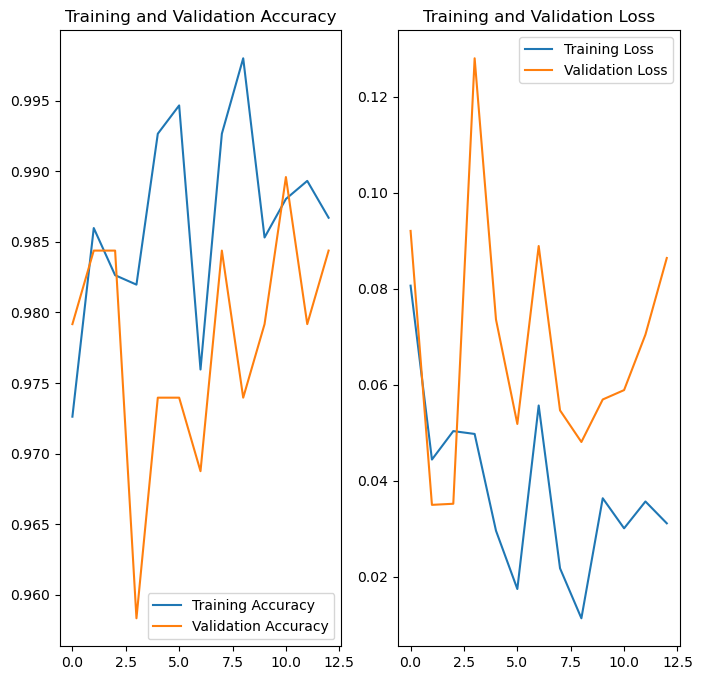

In [49]:
EPOCHS = 13

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 417ms/step
predicted label: Potato___Late_blight


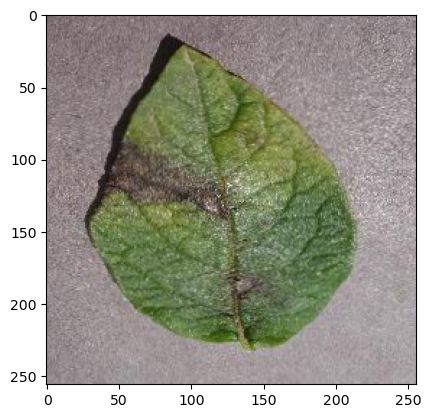

In [52]:


import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break



In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


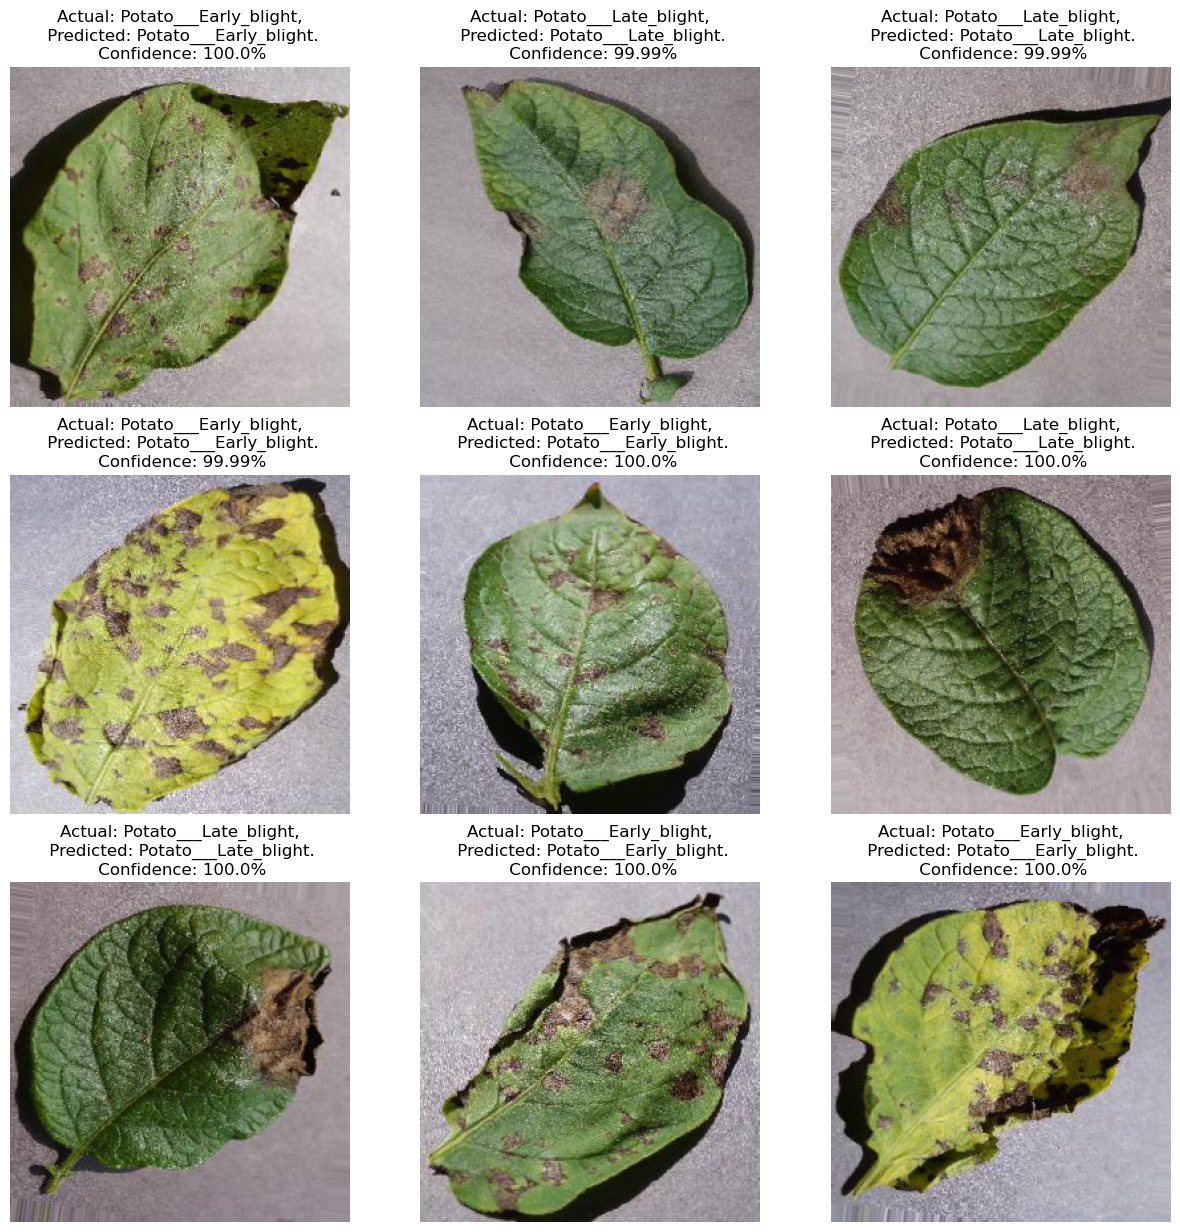

In [55]:


plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

